In [245]:
# Setup code for the notebook
#%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
import ipytools
import data_loader
import visualization

# Get test datas

In [224]:
images_name = [
    '../testdata/input_pair/img_01.tif',
    '../testdata/input_pair/img_02.tif'
]

In [225]:
rpc_name = [
    '../testdata/input_pair/rpc_01.xml',
    '../testdata/input_pair/rpc_02.xml'
]

In [226]:
roi = {
"x": 150,
"y": 150,
"w": 700,
"h": 700
}

In [227]:
tile_size = 300

# Get images from the video 

In [247]:
folders = data_loader.retrieve_video()

892 images


In [248]:
# Chose a pair of images
i, j = 0, 100
images_name = data_loader.choose_video(folders, [i, j])

In [249]:
images_name

['../data/s02_20150507T020554Z/video_frames/s02_20150507T02055427Z.tif',
 '../data/s02_20150507T020554Z/video_frames/s02_20150507T02055760Z.tif']

In [250]:
roi = {
    "x": 0,
    "y": 0,
    "w": 1000,
    "h": 1000
  }

In [251]:
tile_size = 1000
rpc_name = []

# Get Triplets

In [182]:
folders = data_loader.retrieve_triplets()

In [183]:
# Chose a pair of images
d = 2
i = 9
indices = ['1107', '1148']#, '1231']
images_name = data_loader.choose_triplets(folders, d, i, indices)

In [184]:
roi = {
    "x": 0,
    "y": 0,
    "w": 1000,
    "h": 1000
  }

In [185]:
tile_size = 1000
rpc_name = []

# Visualize chosen images

Dimension:  (1349, 3199, 1)
Dimension:  (1349, 3199, 1)



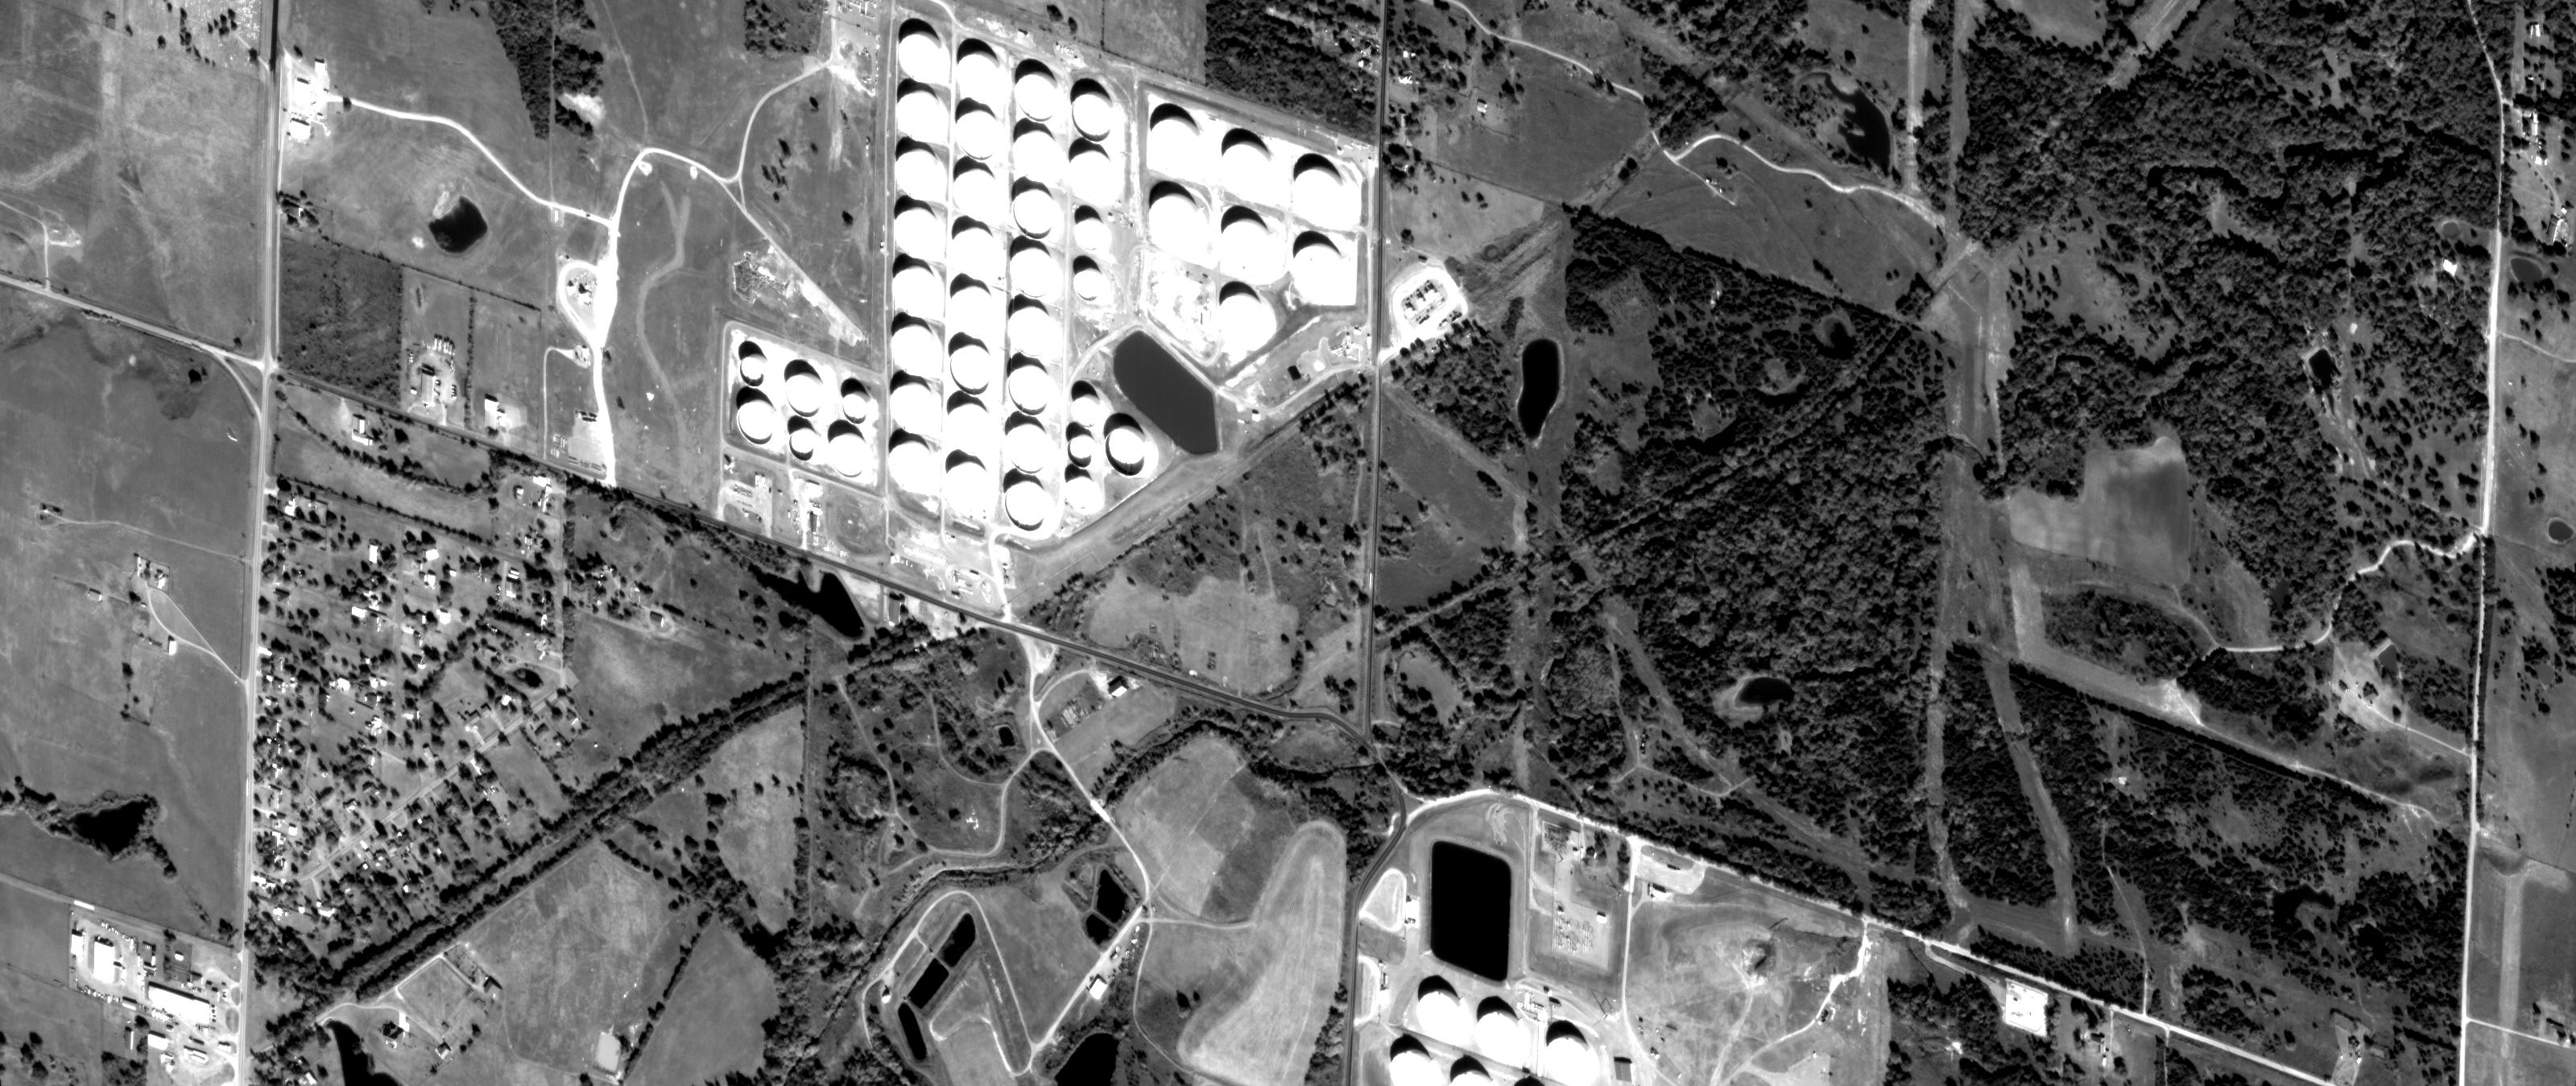
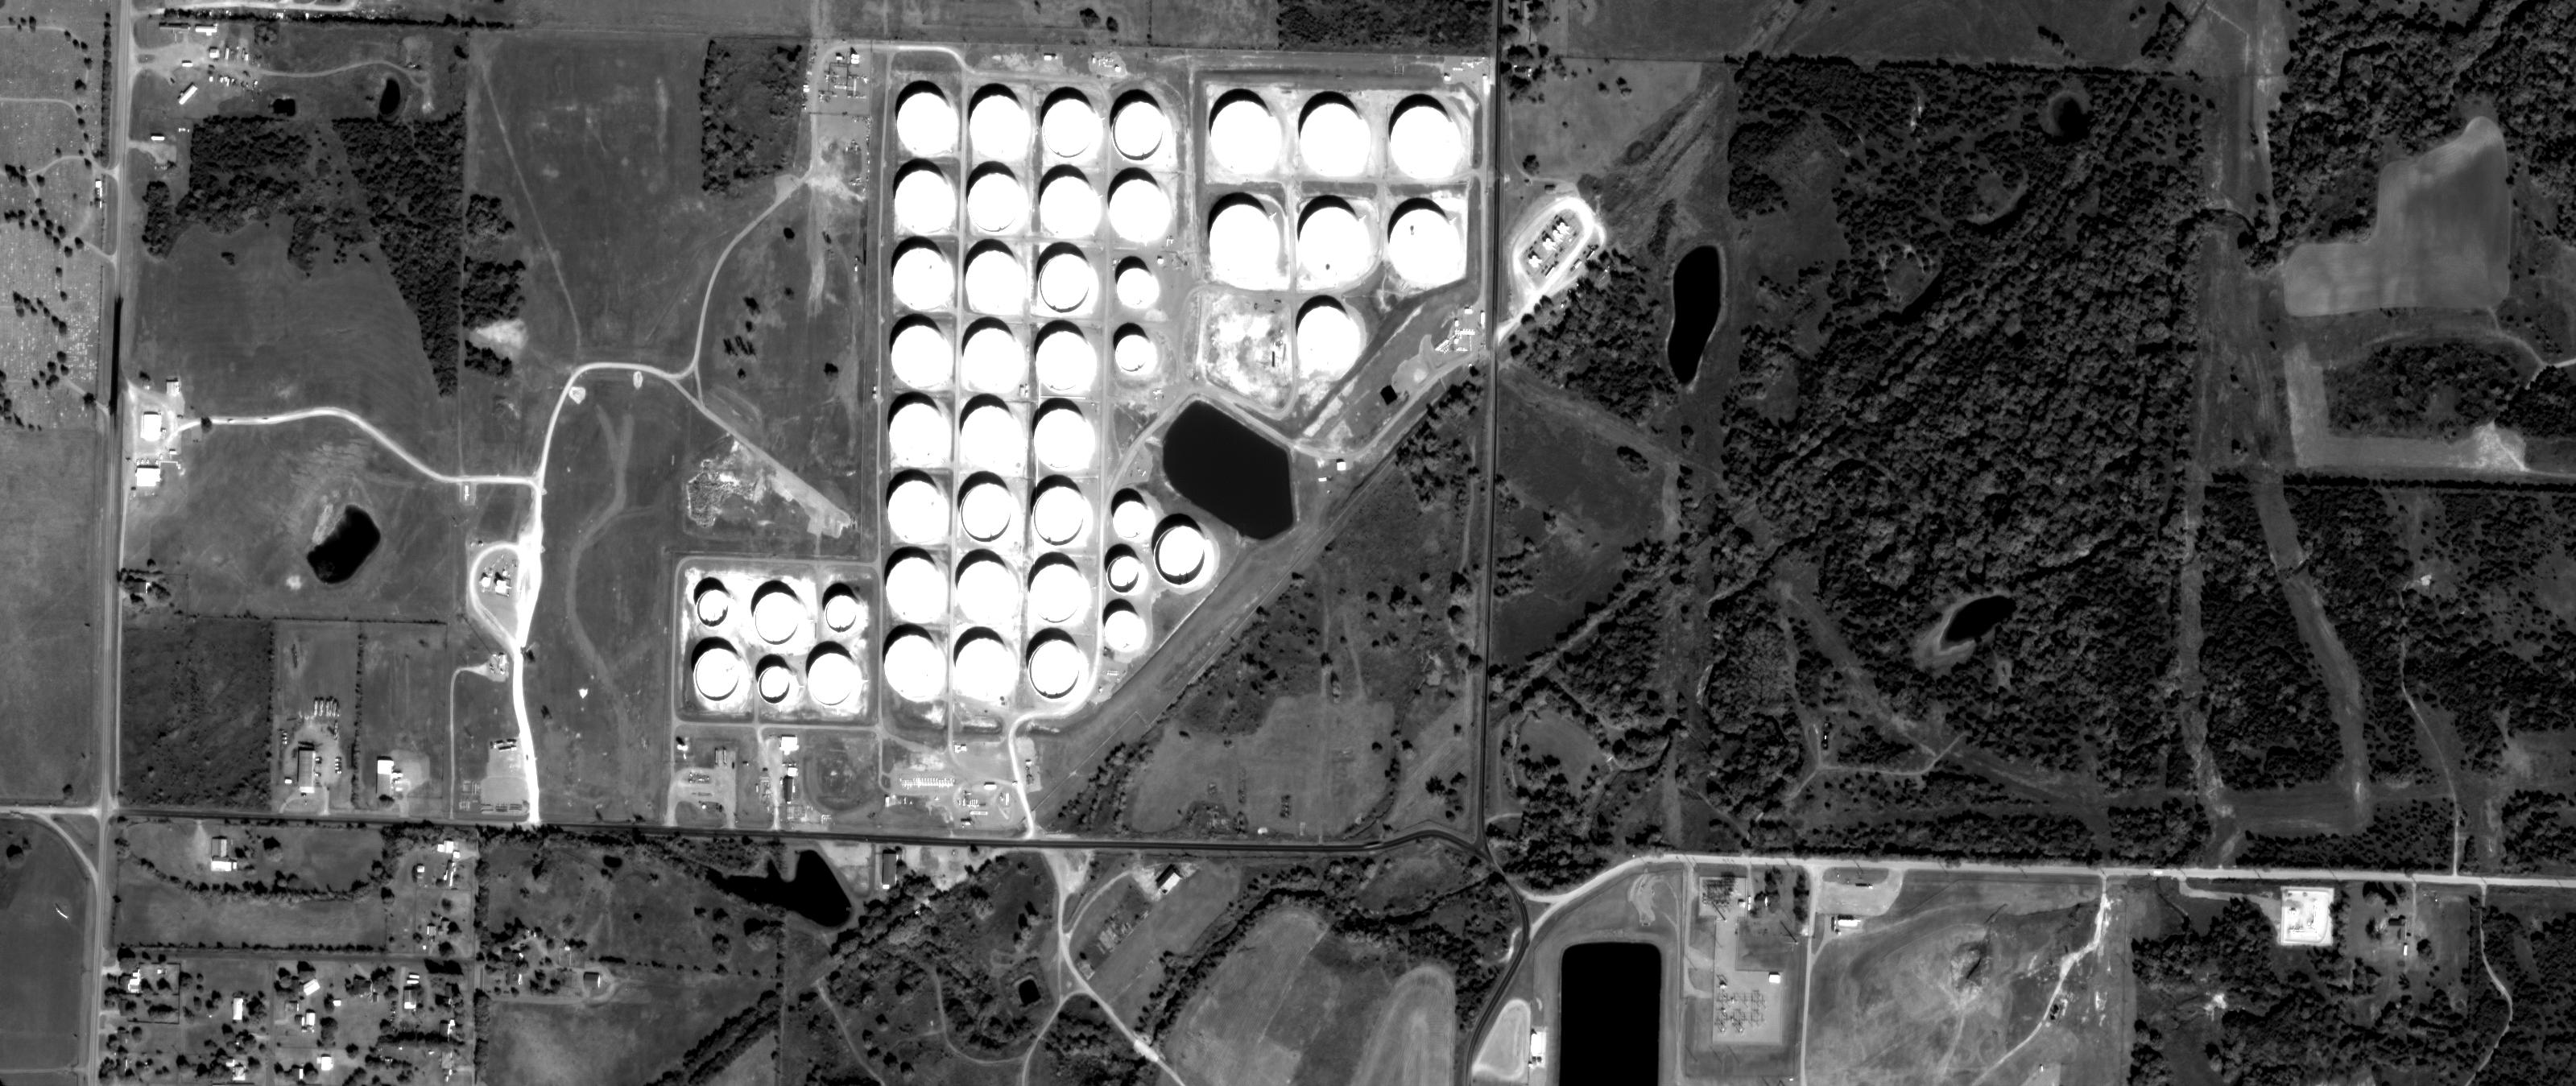

In [186]:
data_loader.display_images(images_name)

Dimension:  (1000, 1000, 1)
Dimension:  (1000, 1000, 1)



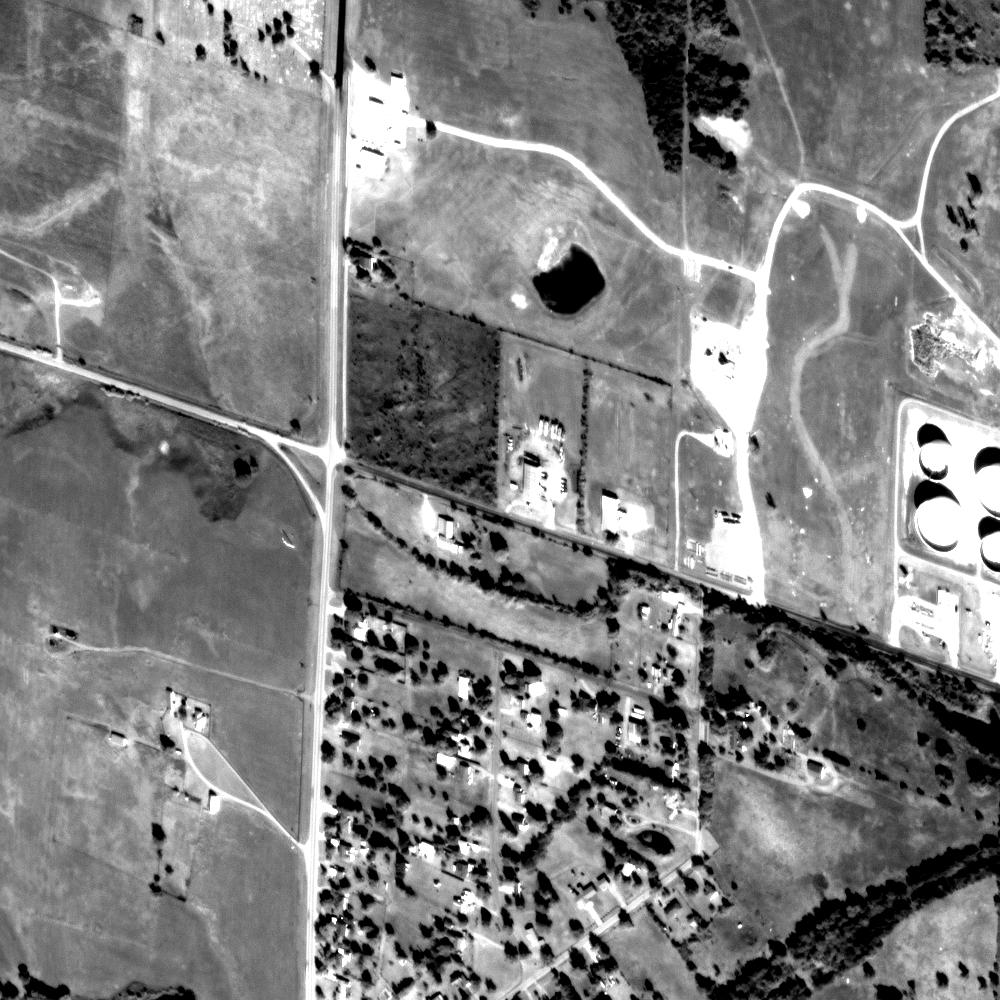
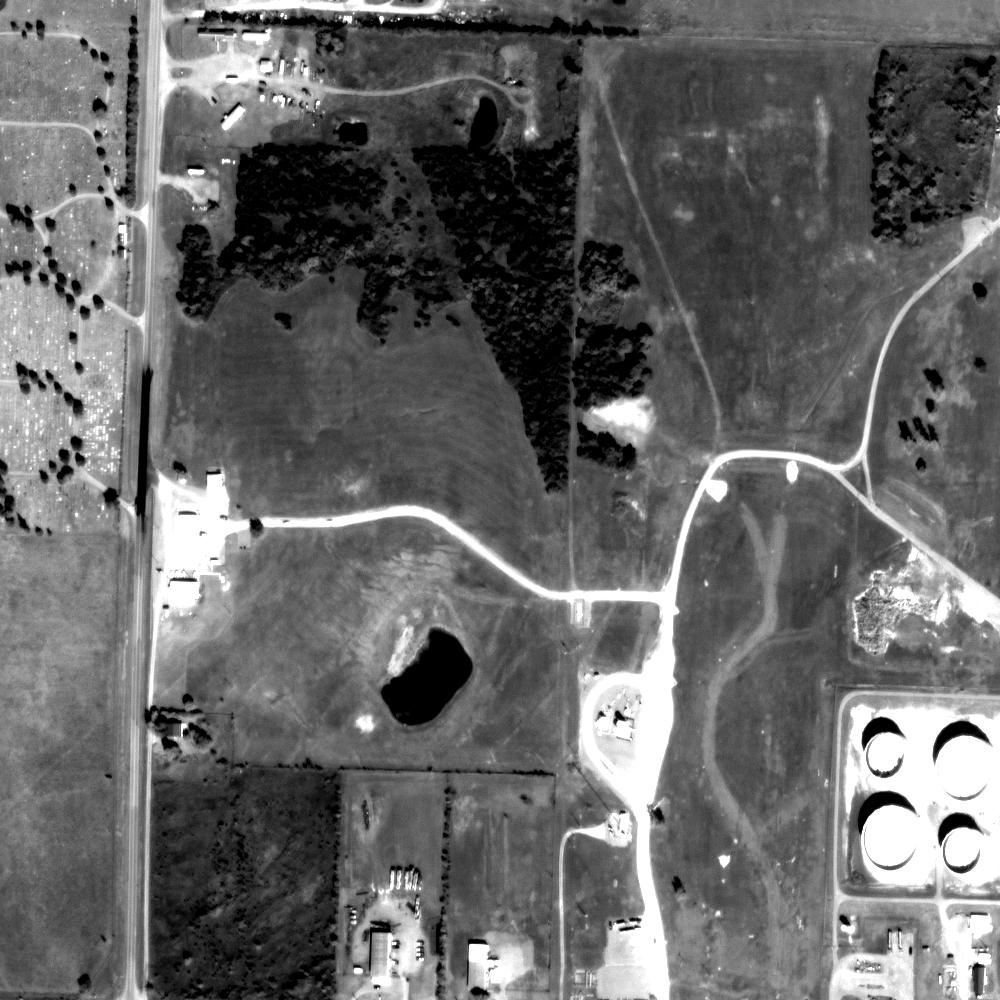

In [187]:
data_loader.display_images(images_name, roi)

# Compare optimizations

In [260]:
# from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm
import numpy as np
def compare(images_name, tile_size=tile_size, roi=None, rpc_name=[]):
    A_list = []
    init_scores = []
    corrected_scores = []
    for i in tqdm([0, 2, 3]):#, 5]):
        # Write JSON
        data_loader.write_json(images_name, tile_size=tile_size, num_variable=i, roi=roi, rpc_name=rpc_name)
        # Excute s2P
#         !rm yaw_extension/test.txt &> /dev/null
        !rm -rf output && cd .. && python3 s2p.py yaw_extension/config.json &> yaw_extension/test.txt
        # tiles path
        tiles_path = visualization.get_tiles_path()
        A_paths = []
        init_scores_path = []
        corrected_scores_paths = []
        for j in range(len(tiles_path)):
            tile_path = tiles_path[j]
            # Retrieves transformation matrix 
            m = visualization.get_matches(tile_path)
            F = visualization.get_affine_fundamental_matrix(tile_path)
            A = visualization.get_correction_matrix(tile_path)
            A_paths.append(A)
            # Compute errors 
            e_2, e_3 = visualization.visualize_pointing_error(F, m, A, plot=False)
            init_scores_path.append(e_2)
            corrected_scores_paths.append(e_3)
        A_list.append(A_paths)
        init_scores.append(init_scores_path)
        corrected_scores.append(corrected_scores_paths)
    return A_list, np.array(init_scores), np.array(corrected_scores)

In [261]:
A_list, init_scores, corrected_scores = compare(images_name, tile_size=tile_size)#, roi=roi, rpc_name=rpc_name)

100%|██████████| 3/3 [01:21<00:00, 27.10s/it]


In [258]:
init_scores

array([[50.42872186, 36.59364179, 91.83381737],
       [50.42872186, 36.59364179, 91.83381737],
       [50.42872186, 36.59364179, 91.83381737]])

In [259]:
np.array(corrected_scores)

array([[47.7426102 , 32.79637911, 54.55604193],
       [47.7426102 , 32.79637911, 54.55604192],
       [49.68678661, 29.1063154 , 70.65934738]])

In [255]:
A_list

[[array([[1.        , 0.        , 2.67750323],
         [0.        , 1.        , 0.21487747],
         [0.        , 0.        , 1.        ]]),
  array([[ 1.        ,  0.        , -1.62843862],
         [ 0.        ,  1.        , -0.13168029],
         [ 0.        ,  0.        ,  1.        ]]),
  array([[ 1.        ,  0.        , -8.54701436],
         [ 0.        ,  1.        , -0.69635572],
         [ 0.        ,  0.        ,  1.        ]])],
 [array([[1.       , 0.       , 2.677511 ],
         [0.       , 1.       , 0.2147806],
         [0.       , 0.       , 1.       ]]),
  array([[ 1.        ,  0.        , -0.99674615],
         [ 0.        ,  1.        , -0.0806047 ],
         [ 0.        ,  0.        ,  1.        ]]),
  array([[ 1.        ,  0.        , -8.45368307],
         [ 0.        ,  1.        , -0.68876388],
         [ 0.        ,  0.        ,  1.        ]])],
 [array([[ 9.99999503e-01, -9.97439535e-04,  1.30335555e-02],
         [ 9.97439535e-04,  9.99999503e-01,  1.0574

# Execution of s2p on Plantet's data

In [205]:
# Number of variable to optimize when correction pointing error
# 0 = use translation
# 2 = only translation enable in optimizer
# 3 = Translation + Rotation
# 5 = Translation + Rotation + center
data_loader.write_json(images_name, tile_size=tile_size, num_variable=0)#, roi=roi, rpc_name=rpc_name)

In [206]:
!rm -rf output && cd .. && python3 s2p.py yaw_extension/config.json

out_dir is: /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output
tile size: 1067 1349
total number of tiles: 3 (3 x 1)

discarding masked tiles...
done 1 / 3 tildone 2 / 3 tildone 3 / 3 tiles
Elapsed time: 0:00:00.145517

correcting pointing locally...
correcting pointing on tile 0 0 pair 1...

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d2_0009.tif 0 0 1067 1349 --thresh-dog 0.013300 -o /tmp/s2p_fjwbr5ud.txt
0:00:02.504216

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d2_0009.tif -338 113 1361 2330 --thresh-dog 0.013300 -o /tmp/s2p_pa3by505.txt
0:00:02.259713

RUN: matching /tmp/s2p_fjwbr5ud.txt /tmp/s2p_pa3by505.txt -relative 0.600000 -o /tmp/s2p_a8wb0c31.txt -f "0.635587749673611 0.1306220579309744 -0.7413831219647495 -0.17122253622848183 126.82284909608808"
33 matches
0:00:03.121873

RUN: ransac fmn 1000 .3 7

0...10...20...30...40...50...60...70...80...90...100 - done.
0:00:00.118162

RUN: qauto /tmp/s2p_ap3p1tym.tif /tmp/s2p_9atr2qdm.png
qauto: rminmax = 0 670
0:00:00.219350

RUN: cp /tmp/s2p_n226cv2a.png /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output/tiles/row_0000000_height_1349/col_0002134_width_1065/pair_1/sift_matches_pointing.png
0:00:00.008017
done 3 / 3 tiles
Elapsed time: 0:00:49.400386

correcting pointing globally...
Elapsed time: 0:00:00.007329

rectifying tiles...
rectifying tile 0 0 pair 1...
reference image:
	rotation: -99.858907 deg
	zoom: 1.082889
	vertical translation: 94.422740

secondary image:
	rotation: -97.505540 deg
	zoom: 0.923456
	vertical translation: -94.422740
max, min, mean rectification error on point matches:  0.18720054255504692 0.0037901019271657788 0.07314755399899349

RUN: gdal_translate -ot Float32 -co TILED=YES -co BIGTIFF=IF_NEEDED -srcwin 0 0 1067 1349 '/Users/juleskozolinsky/Projets/s2p/yaw_extension/../data/s03_20161003T161107Z/panchroma

0:00:00.009366
SIFT disparity range: [-808.800000, 966.000000]
Final disparity range: [-808.800000, 966.000000]

RUN: homography /Users/juleskozolinsky/Projets/s2p/yaw_extension/../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d2_0009.tif -h "-0.24534742372280138 1.0545091457991074 804.8664084892416 -1.0545091457991074 -0.24534742372280138 3709.3484320134035 0.0 0.0 1.0" /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output/tiles/row_0000000_height_1349/col_0002134_width_1065/pair_1/rectified_ref.tif 1723 1464
 - prepareSpline                   : (ms) = 27.5951
 - interpolateSpline               : (ms) = 113.534
0:00:00.288443

RUN: homography /Users/juleskozolinsky/Projets/s2p/yaw_extension/../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d2_0009.tif -h "-0.18591968406025441 0.9047328909873092 248.06880375719072 -0.9047328909873092 -0.18591968406025441 3519.993097814611 0.0 0.0 1.0" /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output/tiles

In [207]:
tiles_path = visualization.get_tiles_path()
print(tiles_path)
tile_path = tiles_path[0]

['./output/tiles/row_0000000_height_1349/col_0000000_width_1067/pair_1', './output/tiles/row_0000000_height_1349/col_0001067_width_1067/pair_1', './output/tiles/row_0000000_height_1349/col_0002134_width_1065/pair_1']


# Retrieve computed values

In [208]:
im_list = visualization.get_images()
im1 = im_list[0]
im2 = im_list[1]

../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d2_0009.tif
../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d2_0009.tif


In [209]:
m = visualization.get_matches(tile_path)
F = visualization.get_affine_fundamental_matrix(tile_path)
A = visualization.get_correction_matrix(tile_path)
print(A)

[[1.         0.         8.86203244]
 [0.         1.         1.82127002]
 [0.         0.         1.        ]]


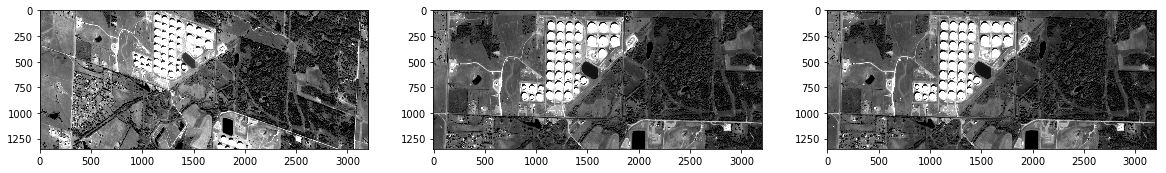

In [210]:
im2_corrected = visualization.visualize_transformation(im1, im2, A)

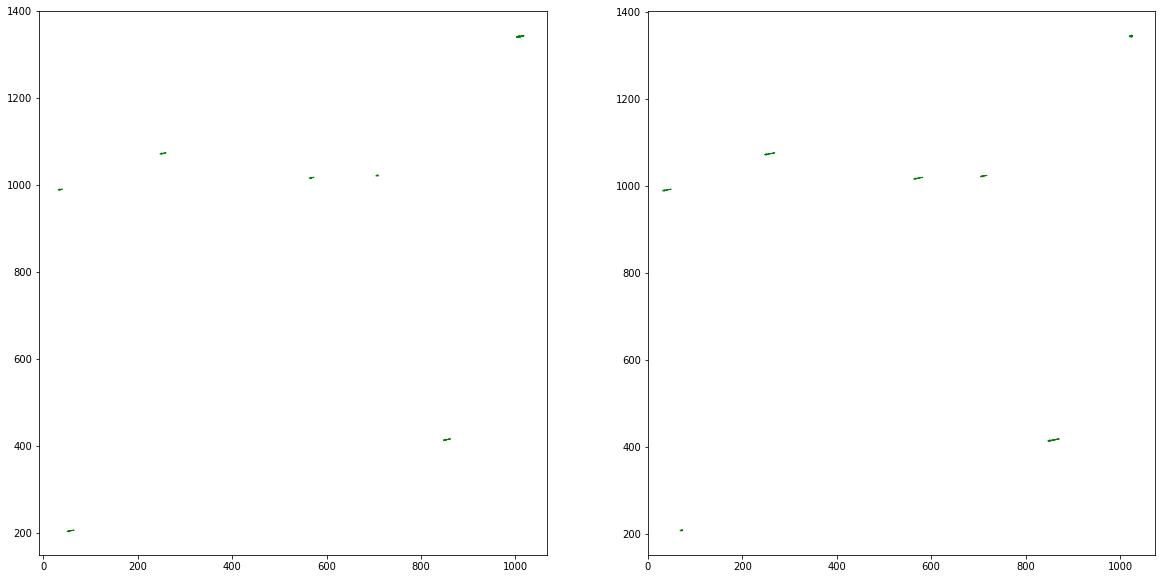

In [211]:
%matplotlib inline
e_2, e_3 = visualization.visualize_pointing_error(F, m, A)

In [212]:
print("error without pointing error correction:", e_2)
print("error with pointing error correction:", e_3)

error without pointing error correction: 186.93189430619398
error with pointing error correction: 110.38704766526044


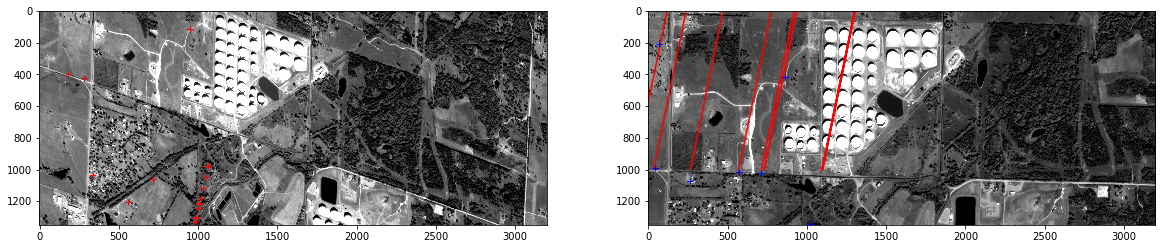

In [213]:
visualization.visualize_epipolar(im1, im2, F, m)

In [69]:
m

array([[692.352, 509.606, 693.897, 557.688],
       [507.553, 518.957, 513.425, 548.167],
       [715.46 , 538.378, 716.281, 590.854],
       [636.226, 543.139, 638.433, 587.719],
       [530.403, 544.411, 535.295, 576.796],
       [625.478, 548.972, 627.853, 591.394],
       [537.52 , 556.048, 541.658, 591.772],
       [610.695, 558.895, 613.265, 599.802],
       [617.368, 559.936, 620.178, 601.951],
       [615.691, 562.683, 618.302, 604.824],
       [550.055, 570.693, 553.437, 610.643],
       [601.082, 570.274, 603.837, 611.54 ],
       [596.663, 583.597, 598.979, 626.717],
       [676.656, 586.611, 677.736, 635.426],
       [619.128, 587.157, 620.967, 633.808],
       [669.923, 588.906, 670.804, 637.591],
       [588.095, 594.019, 590.493, 638.473],
       [619.664, 603.142, 620.985, 651.898],
       [667.72 , 606.219, 668.606, 657.317],
       [667.72 , 606.219, 668.606, 657.317],
       [660.814, 608.289, 661.582, 659.178],
       [562.159, 610.703, 564.149, 657.504],
       [57


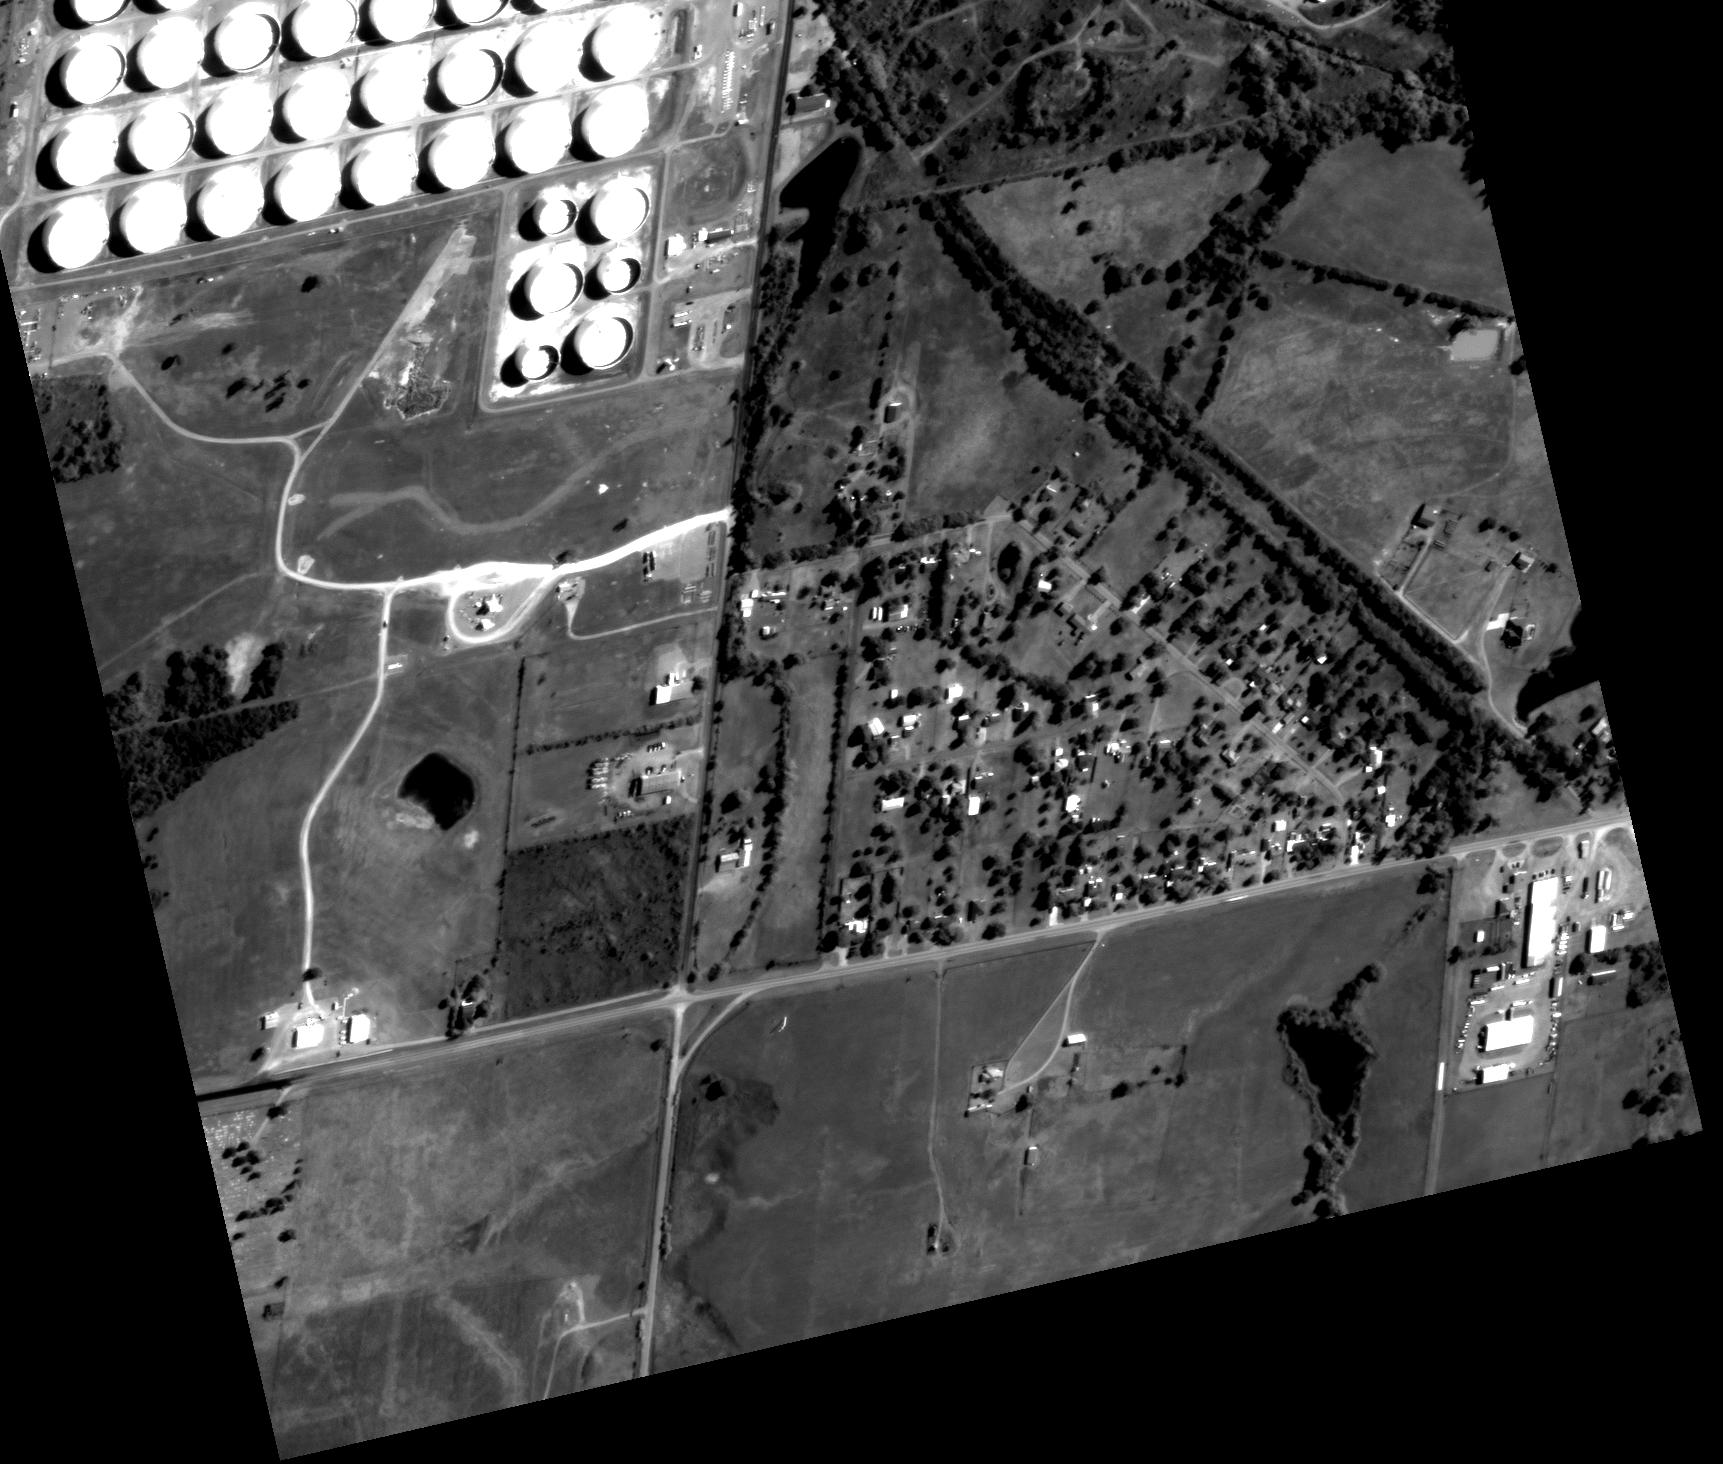
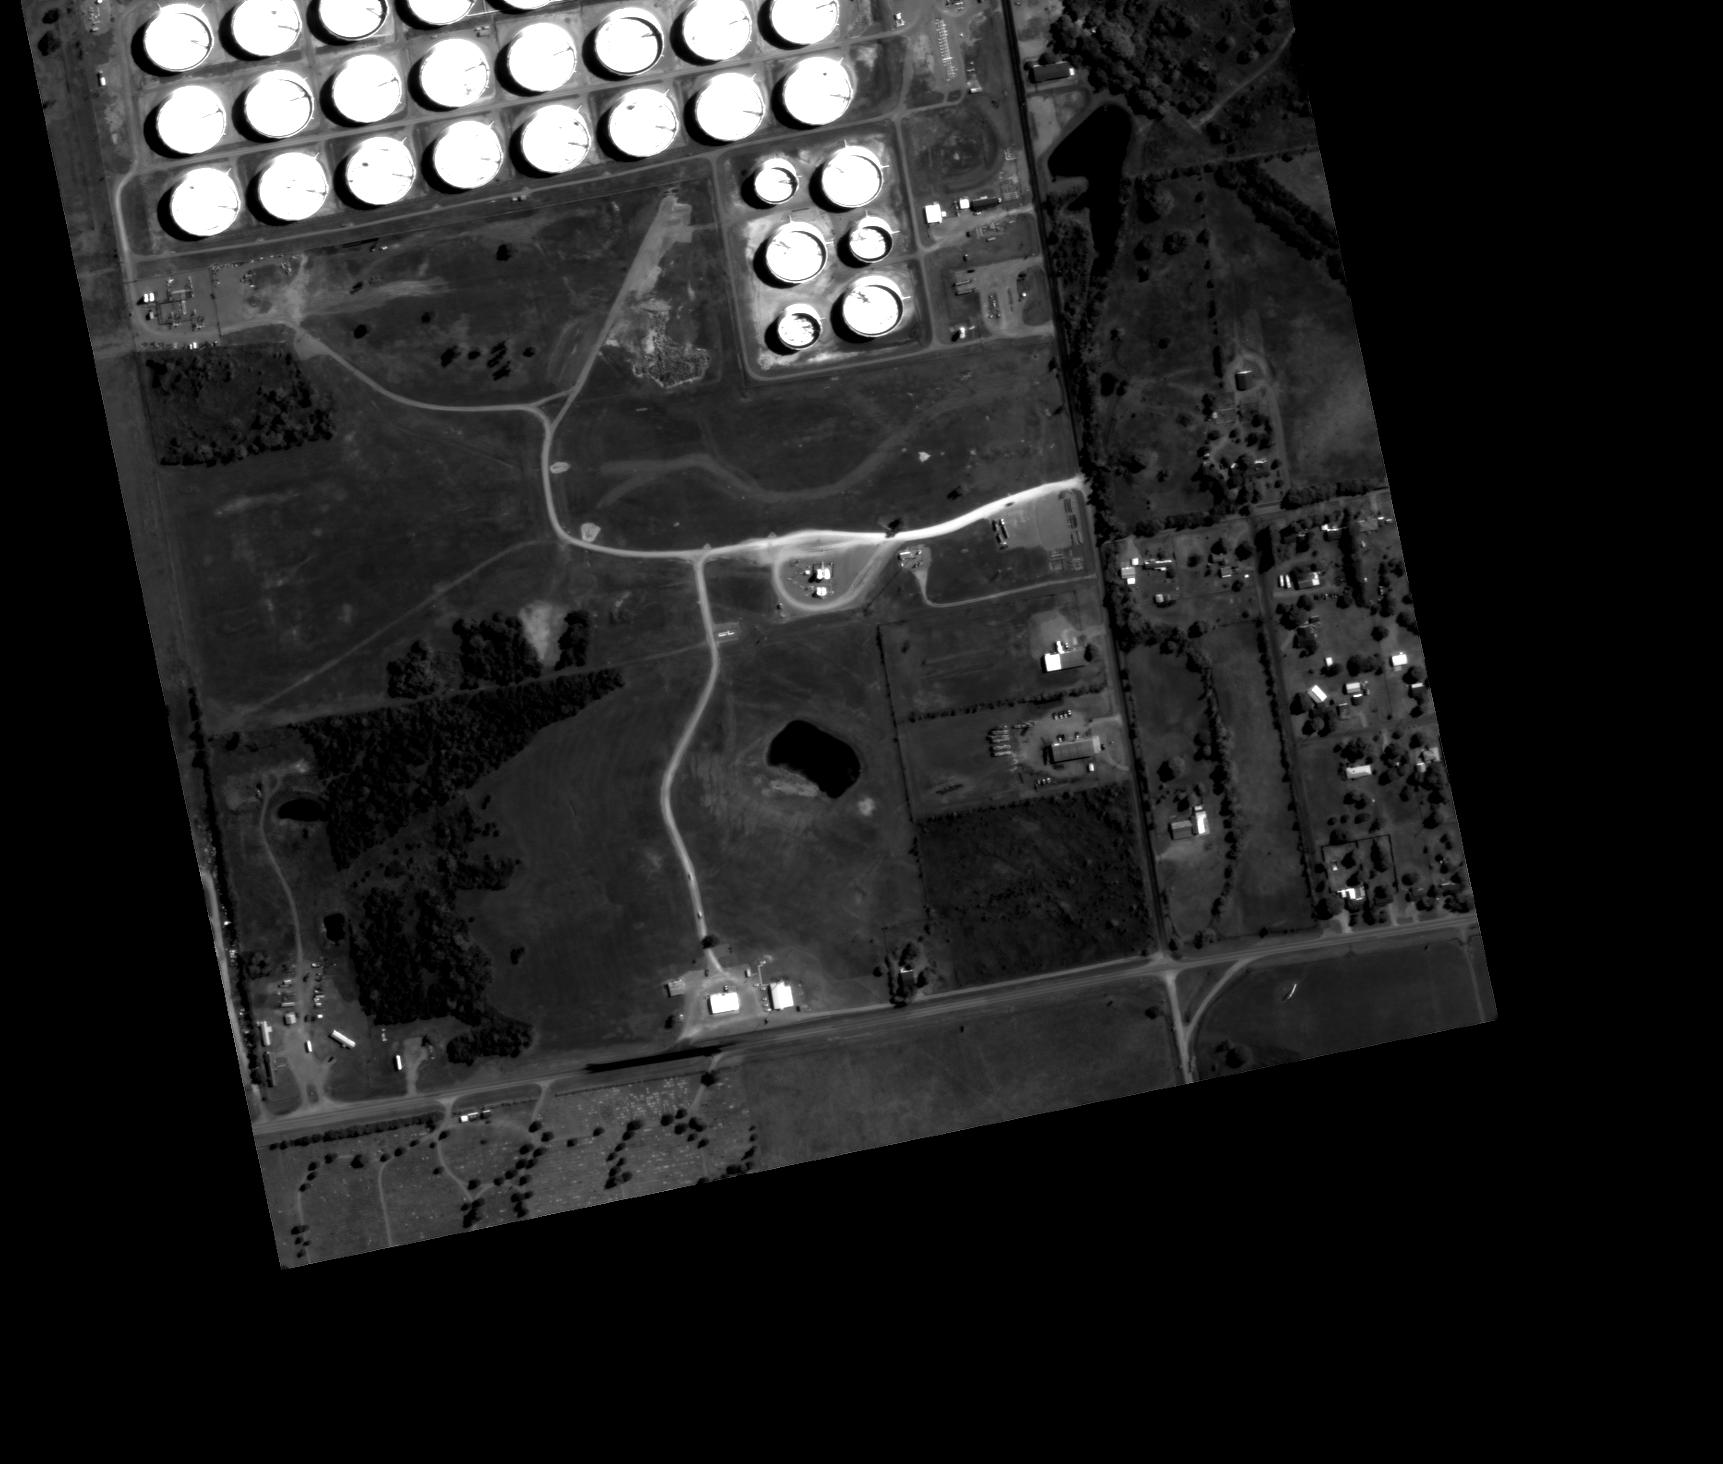

In [214]:
a_ref = tile_path + '/rectified_ref.tif'
a_sec = tile_path + '/rectified_sec.tif'
ipytools.display_gallery([ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)), ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec))])

In [88]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)))

NameError: name 'a_ref' is not defined

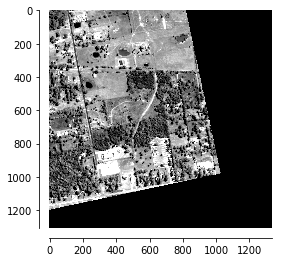

In [220]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec)))

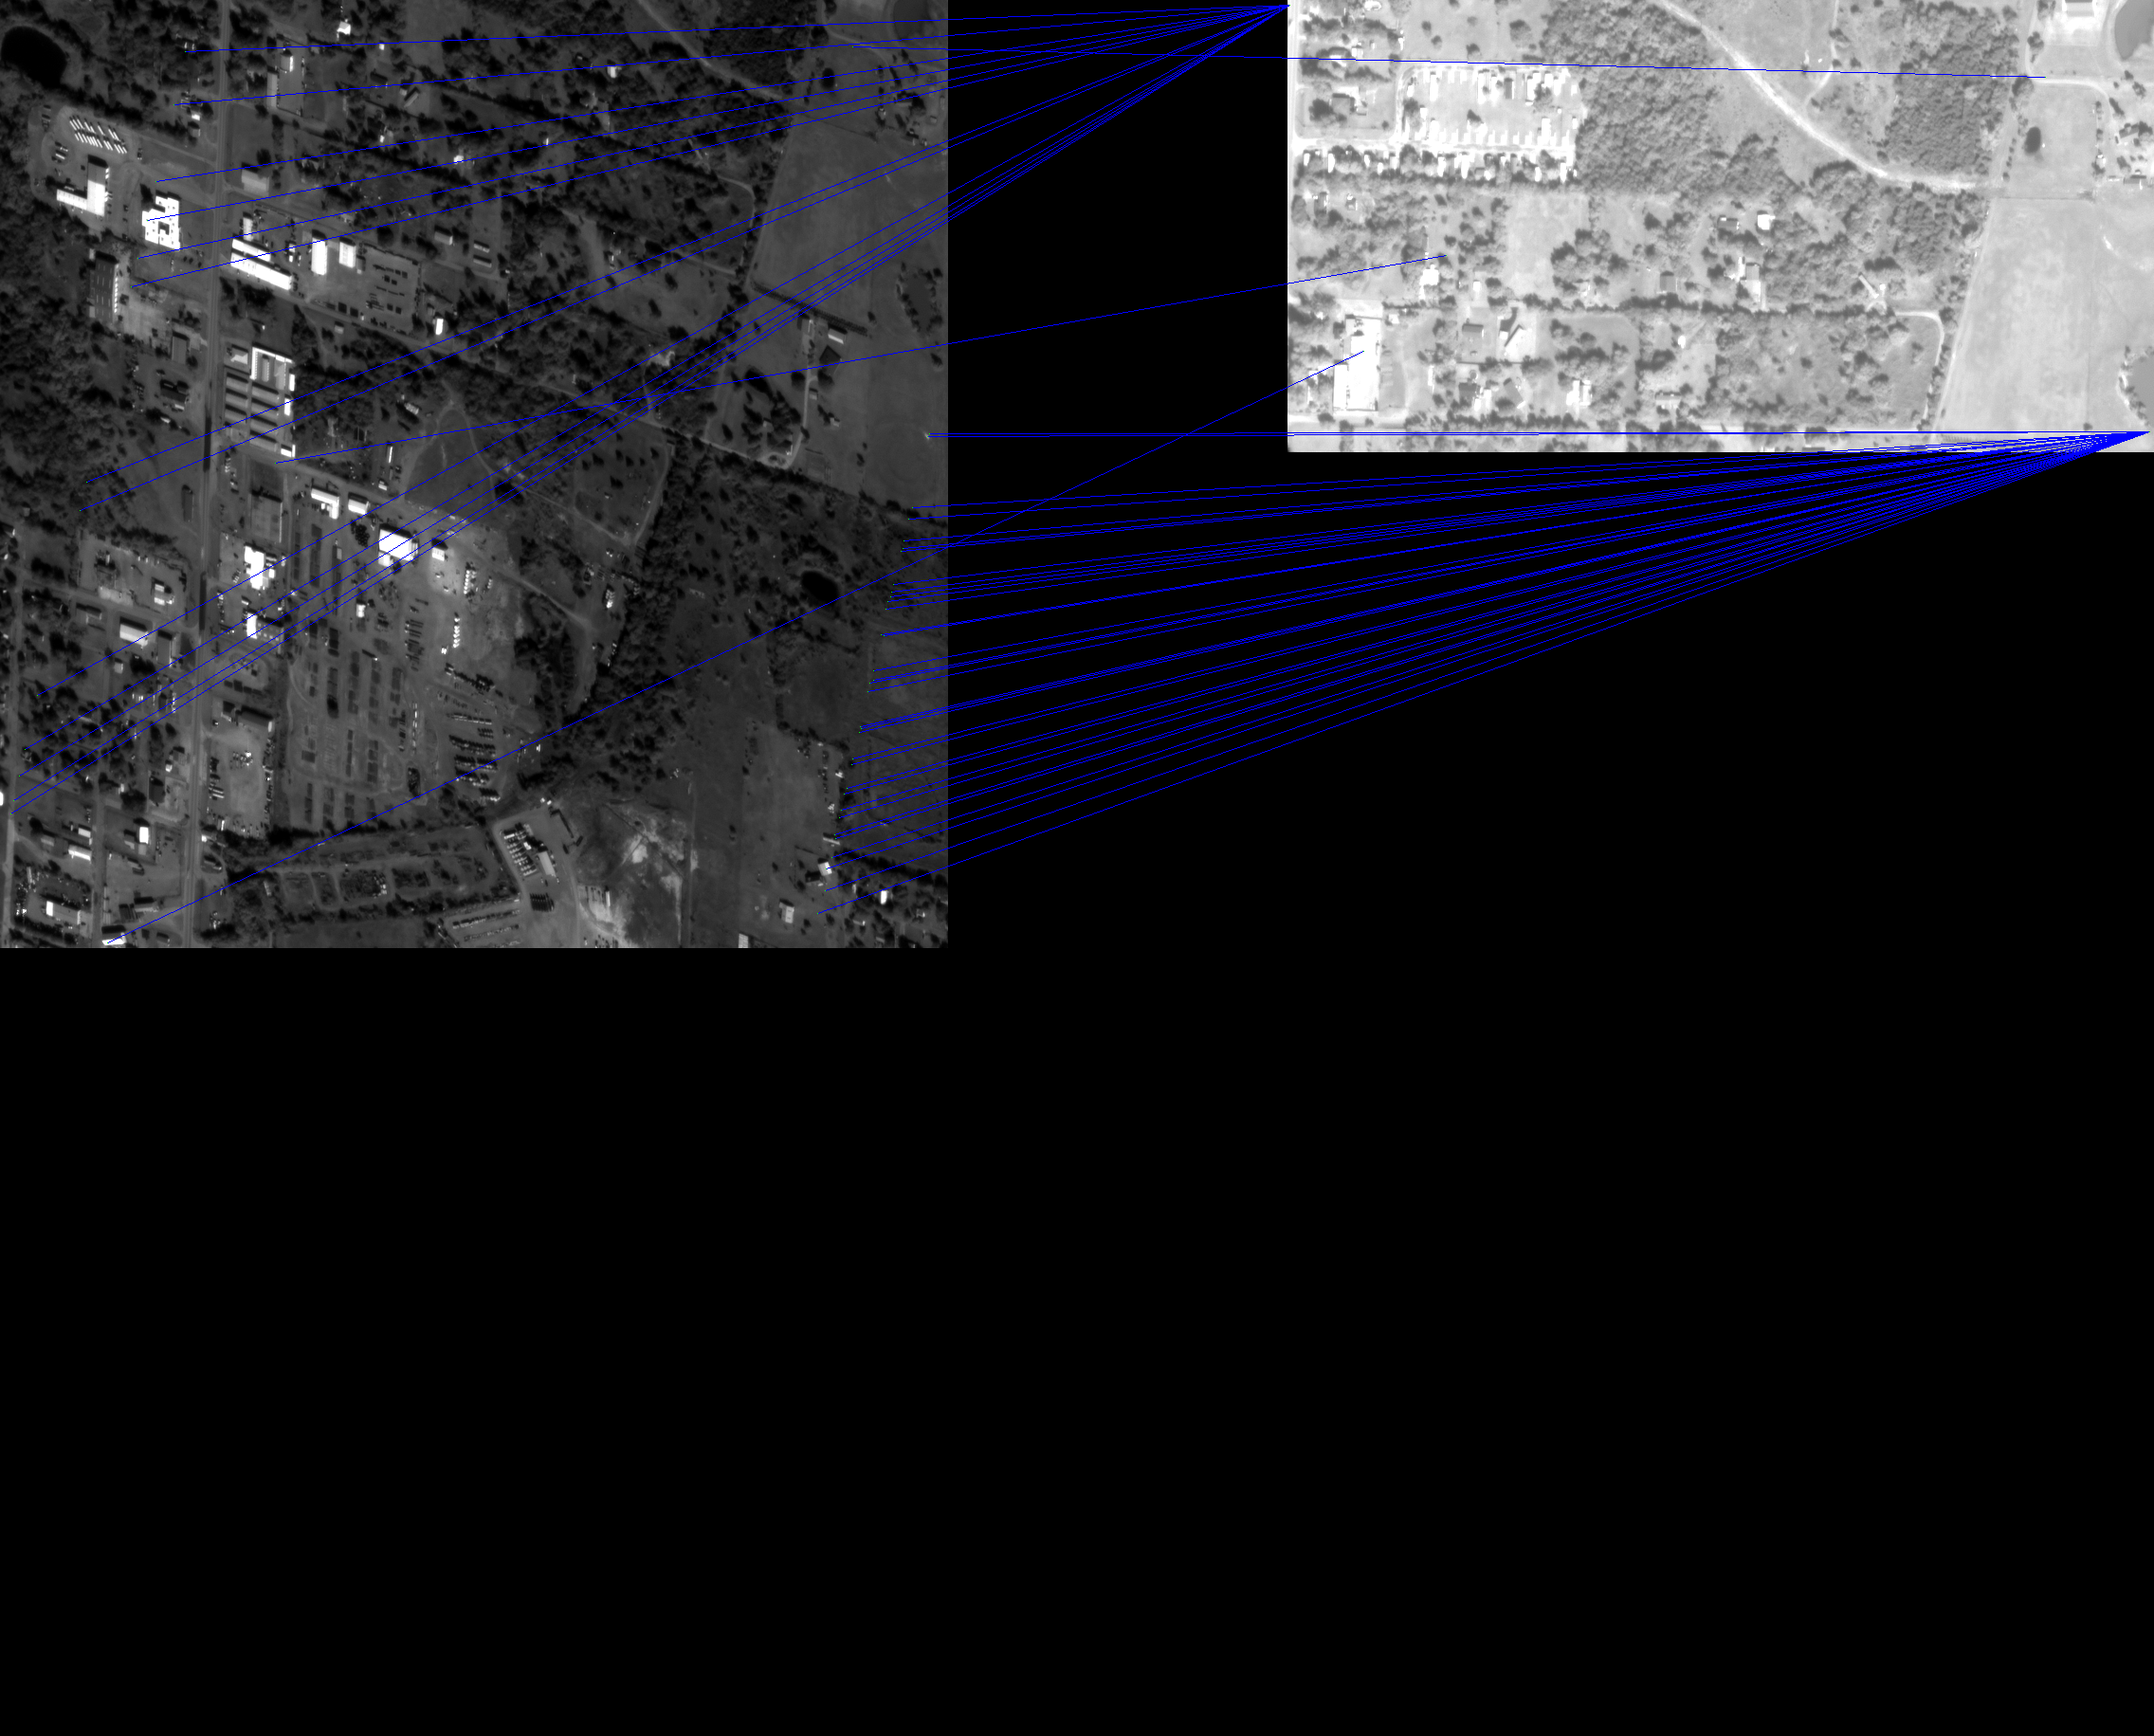

In [221]:
from IPython.display import Image
filename = key + '/sift_matches_pointing.png'
Image(filename=filename) 

In [106]:
expected_output = './output/s03_20161003T161107Z/dsm.tif'
a = readGTIFF(expected_output)

RasterioIOError: ./output/s03_20161003T161107Z/dsm.tif: No such file or directory

<IPython.core.display.Javascript object>


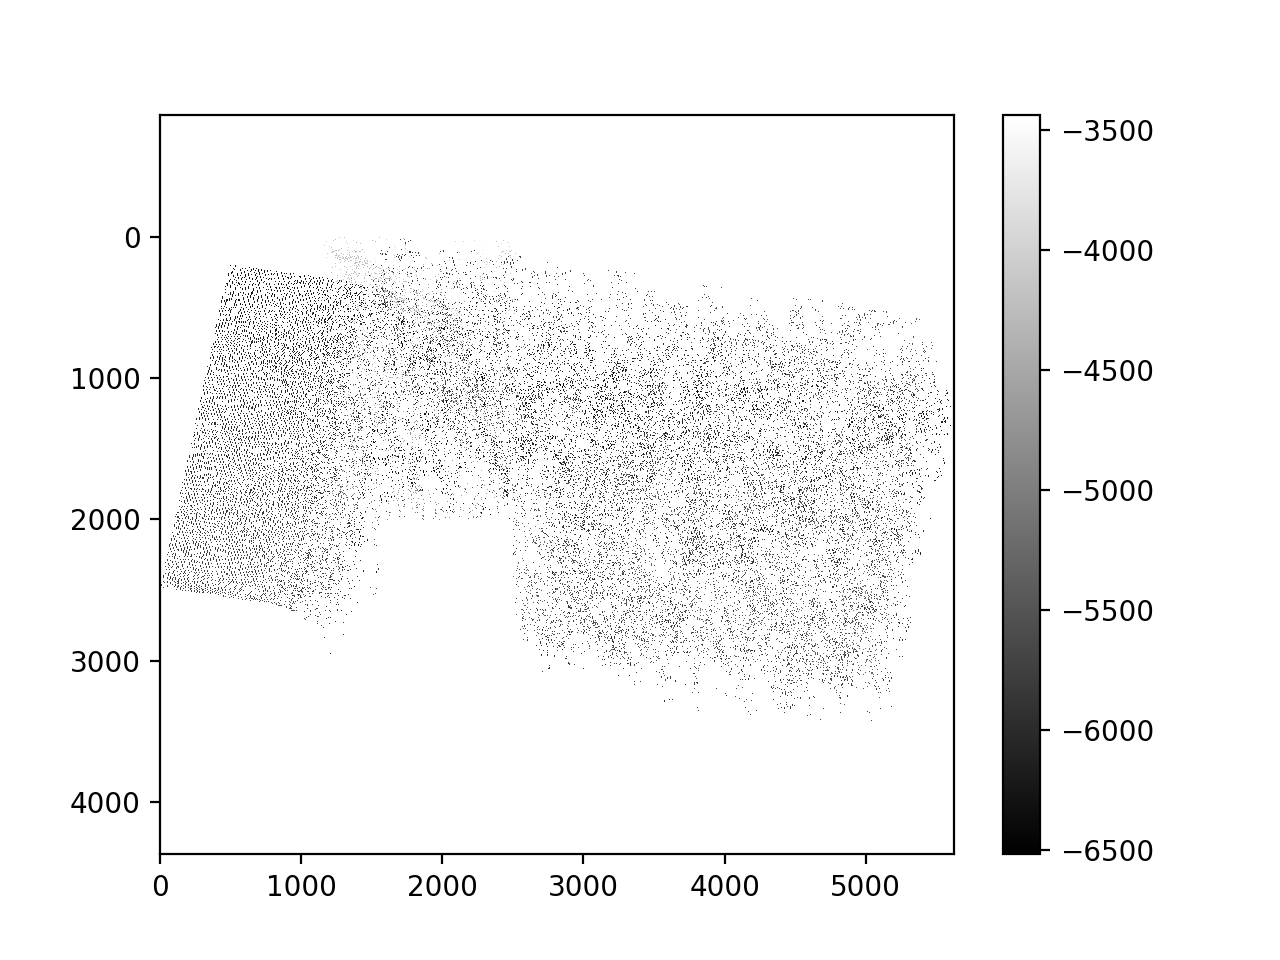

In [18]:
b = a#readGTIFF('/Users/juleskozolinsky/Projets/s2p/yaw_extension/output/s03_20161003T161107Z/tiles/row_0000000_height_500/col_0001000_width_500/dsm.tif')
display_imshow(b)